In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the "weatherAUS.csv" dataset into a pandas DataFrame with the specified encoding and delimiter
df = pd.read_csv('./weatherAUS.csv', encoding = "ISO-8859-1", delimiter=',')

In [3]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Check for missing values by summing the number of null values in each column
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Set the threshold for column elimination (10% missing values)
elimination_threshold = 0.1

# Select columns with less than 10% missing values
valid_columns = missing_values[missing_values < elimination_threshold * len(df)].index

# Filter the DataFrame to keep only the valid columns
df = df[valid_columns]

# Remove rows with any missing values
df = df.dropna()

# Display the first 5 rows of the filtered DataFrame
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


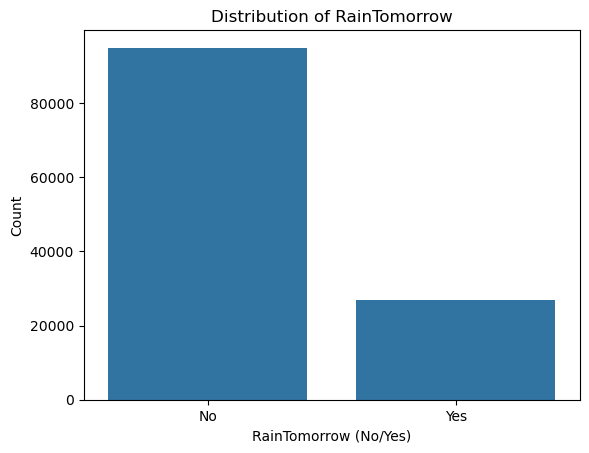

In [6]:
# Plot the distribution of the target variable "RainTomorrow" to check class balance.
sns.countplot(data=df, x="RainTomorrow")
plt.title("Distribution of RainTomorrow")
plt.xlabel("RainTomorrow (No/Yes)")
plt.ylabel("Count")
plt.show()

In [7]:
# Create a new column "RainToday" with 1 for "Yes" and 0 for "No"
df["Is Raining Today"] = np.where(df["RainToday"]=="Yes", 1, 0)

# Create a new column "RainPrediction" with 1 for "Yes" and 0 for "No"
df["Rain Prediction"] = np.where(df["RainTomorrow"]=="Yes", 1, 0)

# Drop the original "RainTomorrow" and "RainToday" columns from the DataFrame
df = df.drop(["RainTomorrow", "RainToday"], axis=1)

In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,Is Raining Today,Rain Prediction
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,9.4,20.9,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,12.5,26.1,0,0


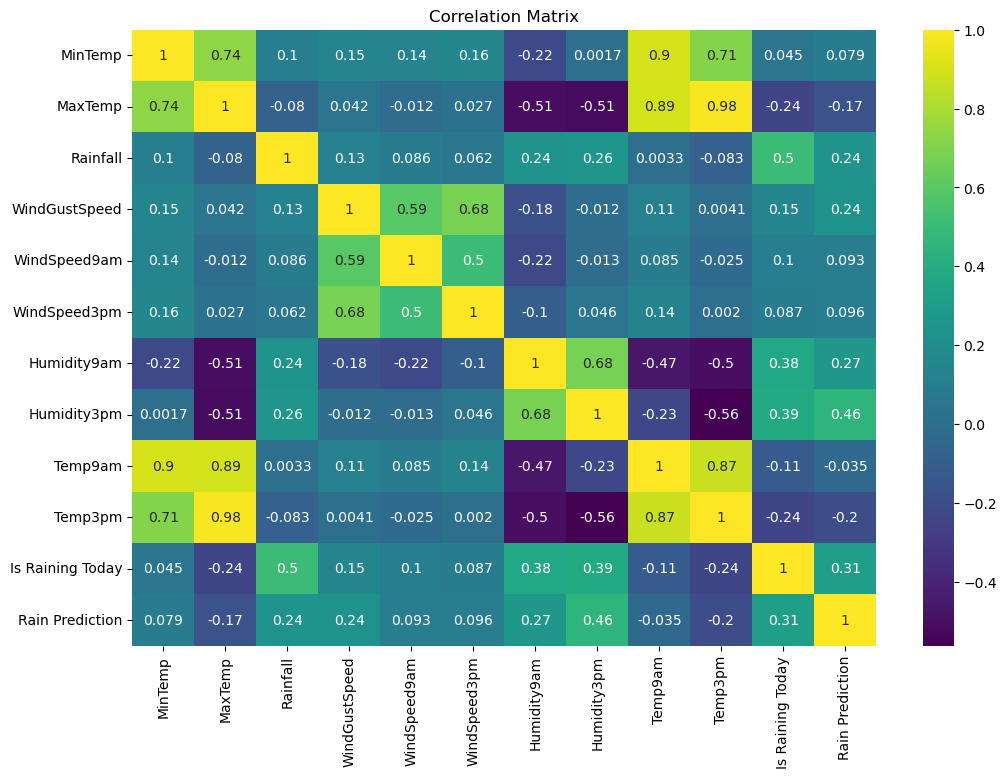

In [9]:
# Select only the numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for the heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis')  # Create the heatmap, annot=True shows the correlation values
plt.title("Correlation Matrix")  # Set the title of the plot
plt.show()  # Display the heatmap

In [10]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Get the absolute correlation values with the target variable ("Predicción Lluvia")
target_correlation = correlation_matrix["Rain Prediction"].abs()

# Identify columns with correlation less than 0.1 (absolute value)
columns_to_drop = target_correlation[target_correlation < 0.1].index

# Drop those columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame and the dropped columns
print("Dropped columns with low correlation (< 0.1):")
print(columns_to_drop)

print("\nCleaned DataFrame:")
print(df.head())

Dropped columns with low correlation (< 0.1):
Index(['MinTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am'], dtype='object')

Cleaned DataFrame:
         Date Location  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     22.9       0.6           W           44.0   
1  2008-12-02   Albury     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  Humidity9am  Humidity3pm  Temp3pm  Is Raining Today  \
0          W        WNW         71.0         22.0     21.8                 0   
1        NNW        WSW         44.0         25.0     24.3                 0   
2          W        WSW         38.0         30.0     23.2                 0   
3         SE          E         45.0         16.0     26.5                 0   
4        ENE         NW

In [11]:
# List of categorical variables
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
# Create dummy variables for each categorical column
dummies = pd.get_dummies(df[categorical_columns], drop_first=True)
# Concatenate the new dummy columns with the original DataFrame
df = pd.concat([df, dummies], axis=1)
# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

In [12]:
df

,Date,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Temp3pm,Is Raining Today,Rain Prediction,Location_Albury,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,22.9,0.6,44.0,71.0,22.0,21.8,0,0,True,...,False,False,False,False,False,False,False,False,True,False
1,2008-12-02,25.1,0.0,44.0,44.0,25.0,24.3,0,0,True,...,False,False,False,False,False,False,False,False,False,True
2,2008-12-03,25.7,0.0,46.0,38.0,30.0,23.2,0,0,True,...,False,False,False,False,False,False,False,False,False,True
3,2008-12-04,28.0,0.0,24.0,45.0,16.0,26.5,0,0,True,...,False,False,False,False,False,False,False,False,False,False
4,2008-12-05,32.3,1.0,41.0,82.0,33.0,29.7,0,0,True,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,21.8,0.0,31.0,59.0,27.0,20.9,0,0,False,...,False,False,False,False,False,False,False,False,False,False
145455,2017-06-21,23.4,0.0,31.0,51.0,24.0,22.4,0,0,False,...,False,False,False,False,False,False,False,False,False,False
145456,2017-06-22,25.3,0.0,22.0,56.0,21.0,24.5,0,0,False,...,False,False,False,False,False,False,False,False,False,False
145457,2017-06-23,26.9,0.0,37.0,53.0,24.0,26.1,0,0,False,...,False,False,False,False,False,False,False,False,True,False


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Convert 'Date' column to a numeric format (e.g., timestamp)
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)  # Convert to ordinal numbers

In [15]:
# Separate features (X) and target (y)
X = df.drop('Rain Prediction', axis=1)  # Features
y = df['Rain Prediction']  # Target variable

In [16]:
# Split the dataset into training and test sets (75% / 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train.shape

(91342, 99)

In [18]:
X_test.shape

(30448, 99)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Convertir la matriz escalada de vuelta a DataFrame para una mejor visualización
df_scaled = pd.DataFrame(df, columns=df.columns)

In [23]:
df_scaled

,Date,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Temp3pm,Is Raining Today,Rain Prediction,Location_Albury,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,733377,22.9,0.6,44.0,71.0,22.0,21.8,0,0,True,...,False,False,False,False,False,False,False,False,True,False
1,733378,25.1,0.0,44.0,44.0,25.0,24.3,0,0,True,...,False,False,False,False,False,False,False,False,False,True
2,733379,25.7,0.0,46.0,38.0,30.0,23.2,0,0,True,...,False,False,False,False,False,False,False,False,False,True
3,733380,28.0,0.0,24.0,45.0,16.0,26.5,0,0,True,...,False,False,False,False,False,False,False,False,False,False
4,733381,32.3,1.0,41.0,82.0,33.0,29.7,0,0,True,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,736500,21.8,0.0,31.0,59.0,27.0,20.9,0,0,False,...,False,False,False,False,False,False,False,False,False,False
145455,736501,23.4,0.0,31.0,51.0,24.0,22.4,0,0,False,...,False,False,False,False,False,False,False,False,False,False
145456,736502,25.3,0.0,22.0,56.0,21.0,24.5,0,0,False,...,False,False,False,False,False,False,False,False,False,False
145457,736503,26.9,0.0,37.0,53.0,24.0,26.1,0,0,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [25]:
# Create the Sequential model
model = Sequential()

# First dense layer with Dropout
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Adjust the number of neurons if needed
model.add(Dropout(0.2))  # Dropout after the first layer

# Second dense layer with Dropout
model.add(Dense(32, activation='relu'))  # Adjust the number of neurons if needed
model.add(Dropout(0.2))  # Dropout after the second layer

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))  # One neuron with sigmoid activation for binary classification

C:\Users\MaríaQueraltSosaMomp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Define EarlyStopping (patience=5)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
# Train model with EarlyStopping
history = model.fit(X_train, y_train, 
                    epochs=30, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping],  # Usamos EarlyStopping
                    verbose=1)

Epoch 1/30
2284/2284 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8020 - loss: 0.4516 - val_accuracy: 0.8508 - val_loss: 0.3623
Epoch 2/30
2284/2284 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8442 - loss: 0.3662 - val_accuracy: 0.8560 - val_loss: 0.3493
Epoch 3/30
2284/2284 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8503 - loss: 0.3563 - val_accuracy: 0.8533 - val_loss: 0.3453
Epoch 4/30
2284/2284 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8518 - loss: 0.3495 - val_accuracy: 0.8525 - val_loss: 0.3440
Epoch 5/30
2284/2284 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8553 - loss: 0.3417 - val_accuracy: 0.8580 - val_loss: 0.3398
Epoch 6/30
2284/2284 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8571 - loss: 0.3388 - val_accuracy: 0.8577 - val_loss: 0.3371
Epoch 7/30
2284/2284 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8584 - loss: 0.3361 - val_accuracy: 0.8582 - val_loss: 0.3362
Epoch 8/30
2284/2284 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8618 - loss: 0

In [29]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Validation loss at the last iteration
print(f"Validation Loss at last iteration: {history.history['val_loss'][-1]}")

952/952 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8536 - loss: 0.3458
Test accuracy: 0.857856035232544
Validation Loss at last iteration: 0.33740928769111633


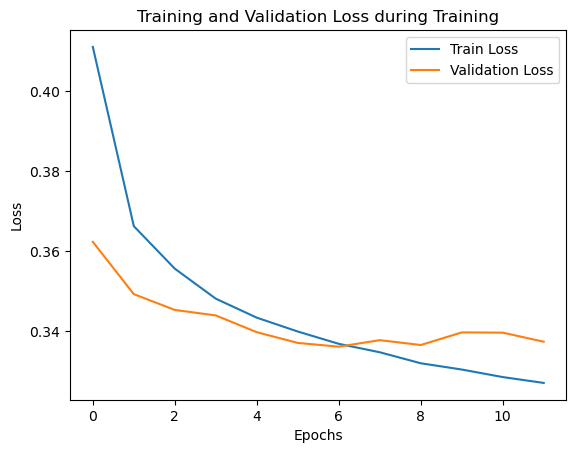

In [30]:
# Visualize the evolution of losses
plt.plot(history.history['loss'], label='Train Loss')  # Plot the training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot the validation loss
plt.title('Training and Validation Loss during Training')  # Set the title of the plot
plt.xlabel('Epochs')  # Label the x-axis as 'Epochs'
plt.ylabel('Loss')  # Label the y-axis as 'Loss'
plt.legend()  # Add a legend to differentiate the lines
plt.show()  # Display the plot

In [31]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)  # Compute the test loss and accuracy
print(f"Test accuracy: {test_acc}")  # Print the test accuracy
print(f"Test loss: {test_loss}")  # Print the test loss

952/952 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8536 - loss: 0.3459
Test accuracy: 0.857856035232544
Test loss: 0.33849799633026123


In [33]:
# Make class predictions (using a threshold of 0.5)
y_pred = model.predict(X_test)  # Get the predicted probabilities for the test set
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to classes (0 or 1) based on the threshold of 0.5

952/952 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)  # Compute the confusion matrix for the true and predicted labels
print("Confusion Matrix:")  # Print the heading for the confusion matrix
print(conf_matrix)  # Print the confusion matrix

Confusion Matrix:
[[22410  1343]
 [ 2985  3710]]


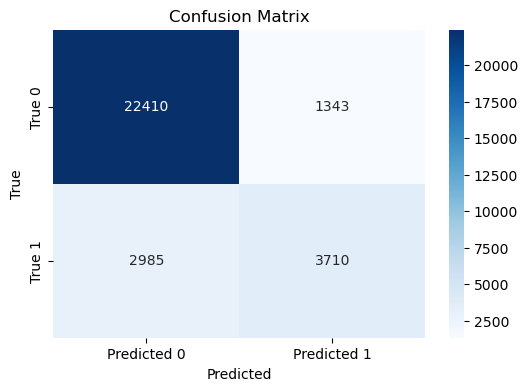

In [35]:
# Visualize the confusion matrix with seaborn
plt.figure(figsize=(6, 4))  # Set the figure size for the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])  
# Create a heatmap with annotations (confusion matrix values), format as integers, and set axis labels for predicted and true values
plt.title('Confusion Matrix')  # Set the title of the plot
plt.xlabel('Predicted')  # Label the x-axis as 'Predicted'
plt.ylabel('True')  # Label the y-axis as 'True'
plt.show()  # Display the plot

In [36]:
# Calculate the F1-Score for each binary category
f1 = f1_score(y_test, y_pred_classes)  # Calculate the overall F1-score for binary classification
print(f"F1-score (Binary Classification): {f1}")  # Print the overall F1-score

# If you want to calculate the F1-score for each class separately, you can do so:
f1_class_0 = f1_score(y_test, y_pred_classes, pos_label=0)  # F1-score for Class 0
f1_class_1 = f1_score(y_test, y_pred_classes, pos_label=1)  # F1-score for Class 1

print(f"F1-score for Class 0: {f1_class_0}")  # Print F1-score for Class 0
print(f"F1-score for Class 1: {f1_class_1}")  # Print F1-score for Class 1

F1-score (Binary Classification): 0.6315968675519237
F1-score for Class 0: 0.9119394481972817
F1-score for Class 1: 0.6315968675519237
